In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
fashion_train_df= pd.read_csv('E:\\BE\\Deep learning\\prac\\fashion-mnist_train.csv')

In [4]:
fashion_test_df = pd.read_csv('E:\\BE\\Deep learning\\prac\\fashion-mnist_test.csv')

In [5]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
fashion_train_df.shape

(60000, 785)

In [9]:
fashion_test_df.shape

(10000, 785)

In [10]:
training = np.array(fashion_train_df,dtype='float32')
testing = np.array(fashion_test_df,dtype='float32')

In [13]:
training.shape

(60000, 785)

In [14]:
import random

0.0

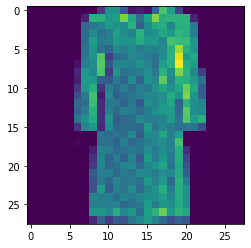

In [22]:
i = random.randint(0,60001) 
plt.imshow(training[i,1:].reshape(28,28)) 
label = training[i,1] 
label

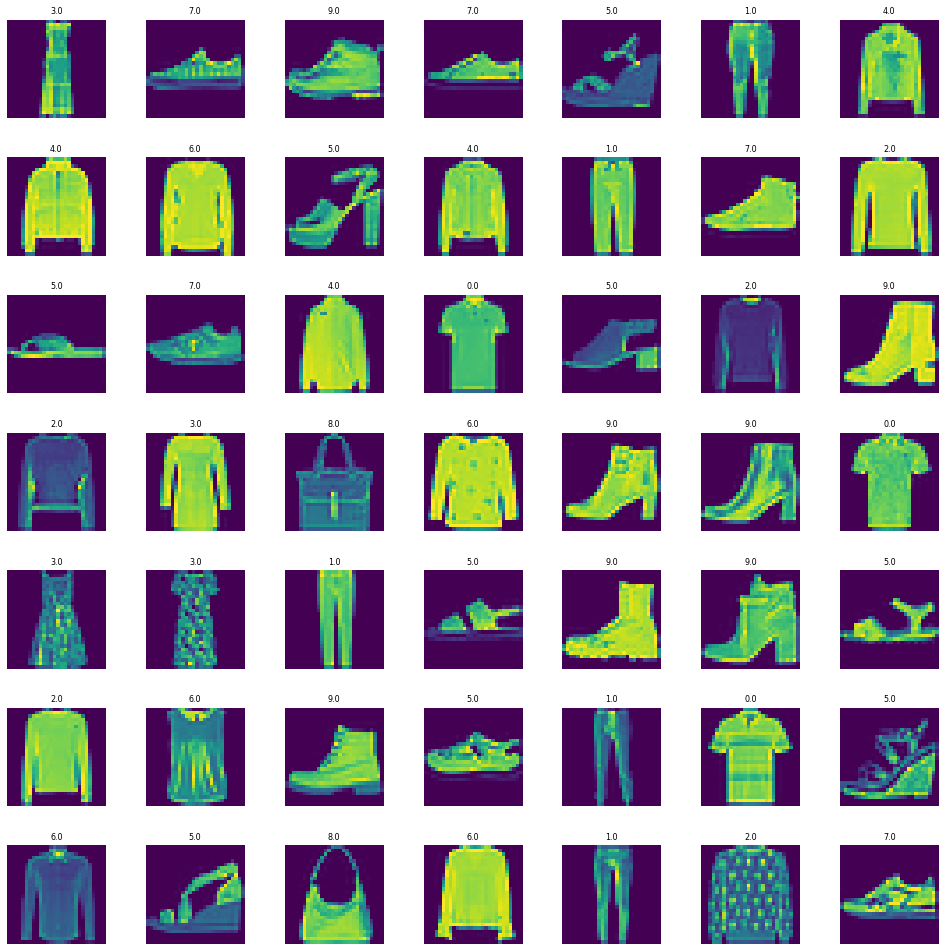

In [42]:
W_grid = 7
L_grid = 7

fig,axes = plt.subplots(L_grid,W_grid,figsize =(17,17))

axes = axes.ravel() 
n_training = len(training) 



for i in np.arange(0,W_grid*L_grid):
        index = np.random.randint(0,n_training)
        axes[i].imshow(training[index,1:].reshape((28,28)))
        axes[i].set_title(training[index,0],fontsize = 8)
        axes[i].axis('off')
        
plt.subplots_adjust(hspace=0.4)  

In [43]:
X_train = training[:,1:]/255
y_train = training[:,0]
X_test = testing[:,1:]/255
y_test = testing[:,0]

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train,test_size = 0.2,random_state = 12345) 

In [45]:
X_train = X_train.reshape(X_train.shape[0],*(28,28,1))
X_test = X_test.reshape(X_test.shape[0],*(28,28,1))
X_validate = X_validate.reshape(X_validate.shape[0],*(28,28,1))

In [46]:
X_train.shape


(48000, 28, 28, 1)

In [47]:
X_test.shape

(10000, 28, 28, 1)

In [48]:
X_validate.shape

(12000, 28, 28, 1)

In [25]:
%pip install tensorflow

     -------------------------------------- 272.8/272.8 MB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 7.3 MB/s eta 0:00:00
     ---------------------------------------- 1.3/1.3 MB 7.4 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 1.5/1.5 MB 8.6 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 10.1 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 3.5 MB/s eta 0:00:00
     -------------------------------------- 126.5/126.5 kB 7.8 MB/s eta 0:00:00
     -------------------------------------- 422.5/422.5 kB 2.0 MB/s eta 0:00:00
     --------------------------------

In [49]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

In [50]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32,3,3,input_shape = (28,28,1),activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size= (2,2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(32,activation = 'relu'))
cnn_model.add(Dense(10,activation = 'sigmoid'))
cnn_model.compile(loss ='sparse_categorical_crossentropy',optimizer = Adam(learning_rate=0.001),metrics= ['accuracy'])


In [51]:
epochs = 200


In [ ]:

cnn_model.fit(X_train,y_train,batch_size =512,epochs = epochs,verbose = 1,validation_data = (X_validate,y_validate) )

Epoch 1/200
94/94 [==============================] - 3s 18ms/step - loss: 1.4392 - accuracy: 0.5174 - val_loss: 0.8477 - val_accuracy: 0.7050
Epoch 2/200
94/94 [==============================] - 1s 16ms/step - loss: 0.7385 - accuracy: 0.7328 - val_loss: 0.6637 - val_accuracy: 0.7589
Epoch 3/200
94/94 [==============================] - 1s 15ms/step - loss: 0.6173 - accuracy: 0.7740 - val_loss: 0.5821 - val_accuracy: 0.7880
Epoch 4/200
94/94 [==============================] - 2s 22ms/step - loss: 0.5561 - accuracy: 0.7974 - val_loss: 0.5347 - val_accuracy: 0.8117
Epoch 5/200
94/94 [==============================] - 2s 26ms/step - loss: 0.5177 - accuracy: 0.8120 - val_loss: 0.5039 - val_accuracy: 0.8223
Epoch 6/200
94/94 [==============================] - 2s 25ms/step - loss: 0.4906 - accuracy: 0.8209 - val_loss: 0.4900 - val_accuracy: 0.8217
Epoch 7/200
94/94 [==============================] - 2s 24ms/step - loss: 0.4712 - accuracy: 0.8292 - val_loss: 0.4667 - val_accuracy: 0.8339
Epoch 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\Users\Dell\AppData\Local\Programs\Python\Python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\Users\Dell\AppData\Local\Programs\Python\Python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\Users\Dell\AppData\Local\Programs\Python\Python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\Users\Dell\AppData\Local\Programs\Python\Python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    d

In [ ]:
evaluation = cnn_model.evaluate(X_test,y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

In [ ]:
predicted_classes = np.argmax(cnn_model.predict(X_test),axis=-1)


313/313 [==============================] - 0s 2ms/step


In [ ]:
predicted_classes

array([0, 1, 2, ..., 8, 8, 1])

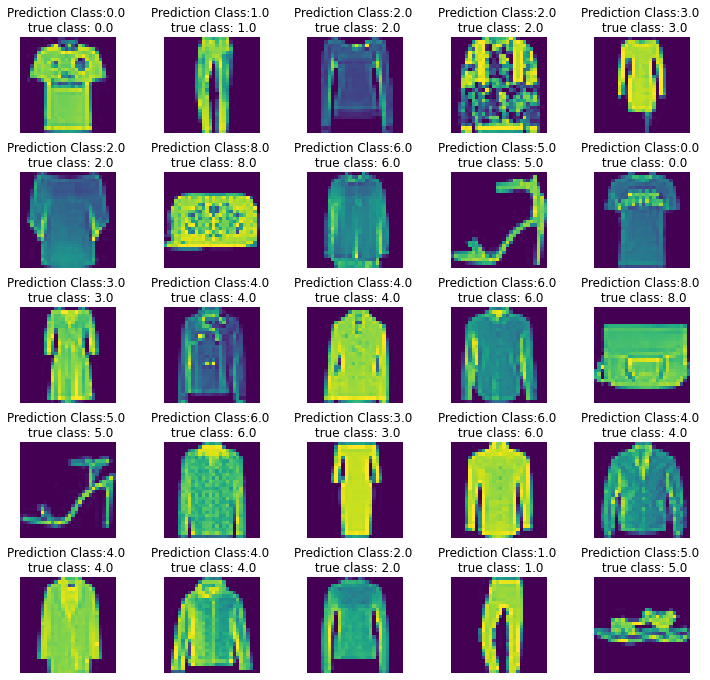

In [ ]:
L = 5
W = 5

fig,axes = plt.subplots(L,W,figsize = (12,12))
axes = axes.ravel()
for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title('Prediction Class:{1} \n true class: {1}'.format(predicted_classes[i],y_test[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace = 0.5)  

In [1]:
from sklearn.metrics import classification_report

classes = 10
targets = ["Class {}".format(i) for i in range(classes)]
print(classification_report(y_test, predicted_classes, target_names = targets))

NameError: name 'y_test' is not defined